# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import torch
import pandas as pd
import pathlib
from pathlib import Path
import json
import argparse
import sys


from CVAE_testbed.utils.greedy_encoding_plots import make_plot_encoding_greedy
from CVAE_testbed.utils.encoding_plots import make_plot_encoding
from CVAE_testbed.models.model_loader import ModelLoader
from CVAE_testbed.bin.CVAE_train import get_model
from CVAE_testbed.utils import str_to_object
from CVAE_testbed.utils.compare_plots import compare_plots_best_performing, plot_single_model_multiple_epoch, plot_multiple_model_multiple_epoch

# Specify path

In [2]:
# path_save_dir = "../../scripts/outputs/baseline_results_swissroll/2019:09:05:14:54:20/"
# path_save_dir = "../../scripts/outputs/baseline_results/2019:09:06:09:25:42/"
# path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/159_features/new/2019:09:06:11:38:11/"

#path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/102_features/2019:09:06:12:50:46/"

#path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/159_features/new2/2019:09:06:12:47:55/"

# path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_features/159_features/fid_greedy/2019:09:08:14:00:09/"

path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_159_features/"
# path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/baseline_results_swissroll/"

#path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/baseline_results_projected/new/2019:09:06:10:48:28/"

# Plot results from Greedy search

In [3]:
stats = pd.read_csv(path_save_dir / Path('first_features.csv'))
stats_2 = pd.read_csv(path_save_dir / Path('selected_features.csv'))

(149, 159)

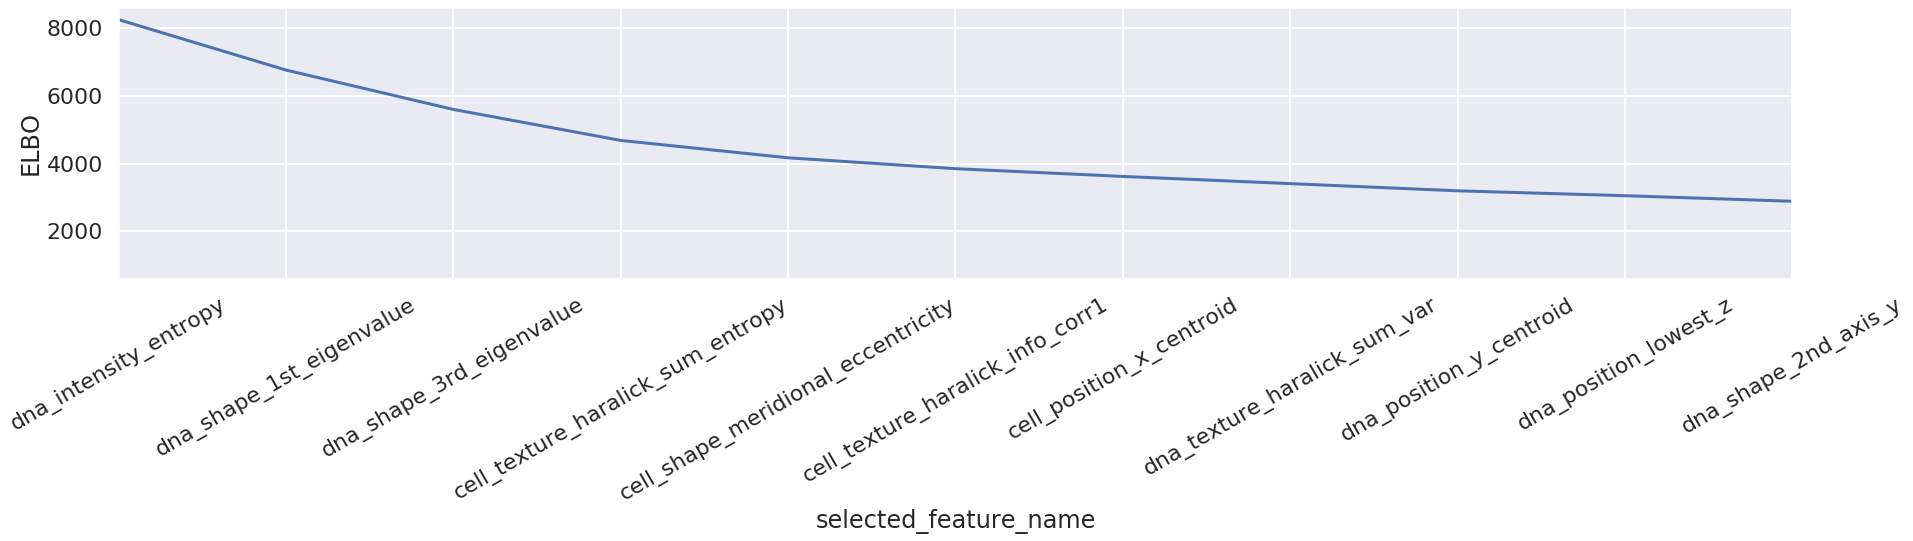

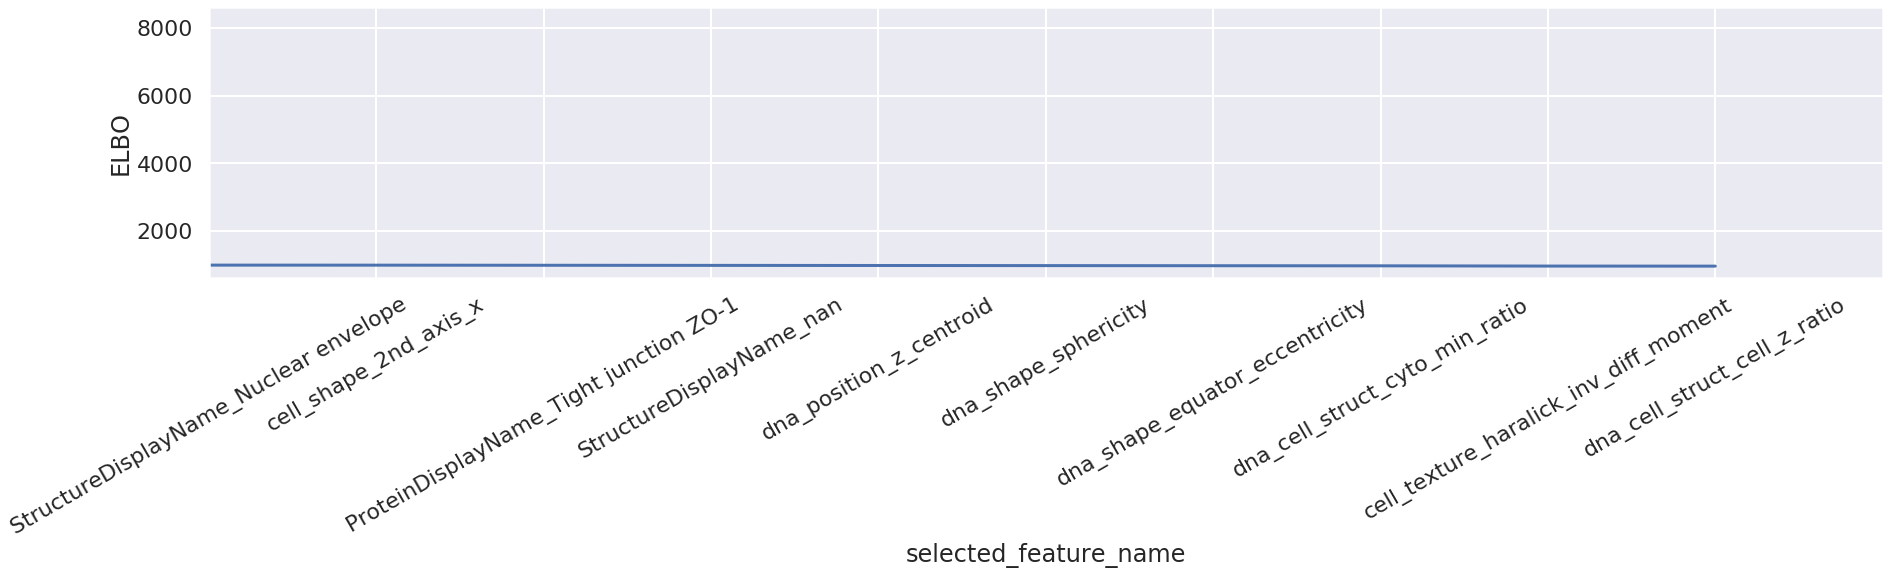

In [4]:
sns.set_context('poster')
fig, ax = plt.subplots(1,1,figsize = (30,5))
stats_2.sort_values(by='ELBO', ascending=False, inplace=True)
bar_fig = sns.lineplot(ax = ax,data=stats_2, x = 'selected_feature_name', y = 'ELBO', sort=False)
for item in bar_fig.get_xticklabels():
    item.set_rotation(30)
ax.set_xlim([0, 10])

sns.set_context('poster')
fig, ax = plt.subplots(1,1,figsize = (30,5))
stats_2.sort_values(by='ELBO', ascending=False, inplace=True)
bar_fig = sns.lineplot(ax = ax,data=stats_2, x = 'selected_feature_name', y = 'ELBO', sort=False)
for item in bar_fig.get_xticklabels():
    item.set_rotation(30)
ax.set_xlim([149, 159])

# Load training options

In [5]:
this_json = json.loads(open(path_save_dir + 'training_options.json').read())

In [6]:
this_json

{'batch_size': 64,
 'num_batches': 1000,
 'beta_vae': 1.0,
 'json_quilt_path': '/home/ritvik.vasan/test/',
 'binary_real_one_hot_parameters': {'binary_range': [0, 1],
  'binary_loss': 'BCE',
  'real_range': [1, 103],
  'real loss': 'MSE',
  'one_hot_range': [103, 159],
  'one_hot_loss': 'CE'},
 'config_path': '/home/ritvik.vasan/config.json',
 'C_vae': 0,
 'dataloader': 'CVAE_testbed.datasets.quilt_aics_features.QuiltAicsFeatures',
 'gpu_id': 0,
 'loss_fn': 'CVAE_testbed.losses.ELBO.combined_loss',
 'lr': 0.001,
 'model_fn': 'CVAE_testbed.models.CVAE_baseline.CVAE',
 'model_kwargs': {'x_dim': 159,
  'c_dim': 318,
  'enc_layers': [159, 256, 256, 256, 256, 256, 512, 512],
  'dec_layers': [512, 512, 256, 256, 256, 256, 256, 159]},
 'post_plot_kwargs': {'latent_space_colorbar': 'no'},
 'n_epochs': 30,
 'data_type': 'aics_features',
 'path_save_dir': './outputs/aics_159_features/'}

In [7]:
args = argparse.Namespace()
argparse_dict = vars(args)
argparse_dict.update(this_json)

In [8]:
device = (
    torch.device("cuda", args.gpu_id)
    if torch.cuda.is_available()
    else torch.device("cpu")
)

In [9]:
num_batches = this_json['num_batches']
batch_size = this_json['batch_size']
dataloader = this_json['dataloader']
model_kwargs = this_json['model_kwargs']
gpu_id = this_json['gpu_id']
model_fn = this_json['model_fn']

# Load model

In [10]:
model = get_model(model_fn, model_kwargs).to(device)


In [11]:
path_weights = path_save_dir / Path('weights.pt')
model.load_state_dict(torch.load(path_weights))
model.eval()

CVAE(
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (encoder_net): Sequential(
    (0): Linear(in_features=477, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReL

# Load data

In [12]:
load_data = str_to_object(dataloader)

In [13]:
model_kwargs

{'x_dim': 159,
 'c_dim': 318,
 'enc_layers': [159, 256, 256, 256, 256, 256, 512, 512],
 'dec_layers': [512, 512, 256, 256, 256, 256, 256, 159]}

In [14]:
P = None

Add this block for projected baseline data

In [15]:
path_weights = path_save_dir / Path('projection_options.pt')
# model.load_state_dict(torch.load(path_weights))
# model.eval()
P = torch.load(path_weights)

this_dataloader = load_data(
                    args.num_batches, args.batch_size,args.model_kwargs, shuffle=False, P = P, train=False
                           )
feature_names = None

In [15]:
this_dataloader = load_data(
                    args.num_batches, args.batch_size, args.model_kwargs, shuffle=False, train=False
                        )

In [16]:
X_test, C_test, Cond_indices_test = this_dataloader.get_all_items()

Add this block for aics feature data

In [17]:
feature_names = this_dataloader.get_feature_names()

# Make encoding plots

In [19]:
stats = pd.read_csv(path_save_dir / Path('costs.csv'))

/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  selected_feature_number selected_feature_name        ELBO        RCL  \
0                    None                  None  161.067291  37.938644   
1                       0                  None   61.942162  13.110888   
5                       0                  None    1.404858   1.307593   
2                       1                  None    0.943192   0.708351   
3                       2                  None    0.610310   0.425417   
4                       4                  None    0.464586   0.387713   

          KLD  
0  123.128639  
1   48.831272  
5    0.097265  
2    0.234841  
3    0.184893  
4    0.076873  


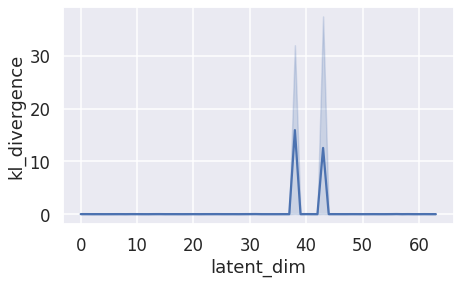

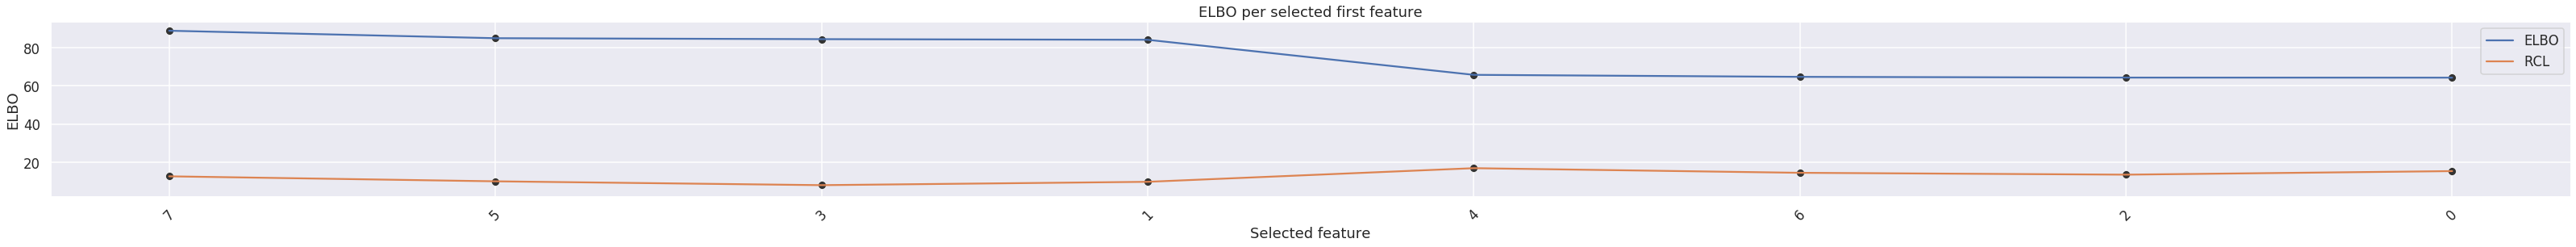

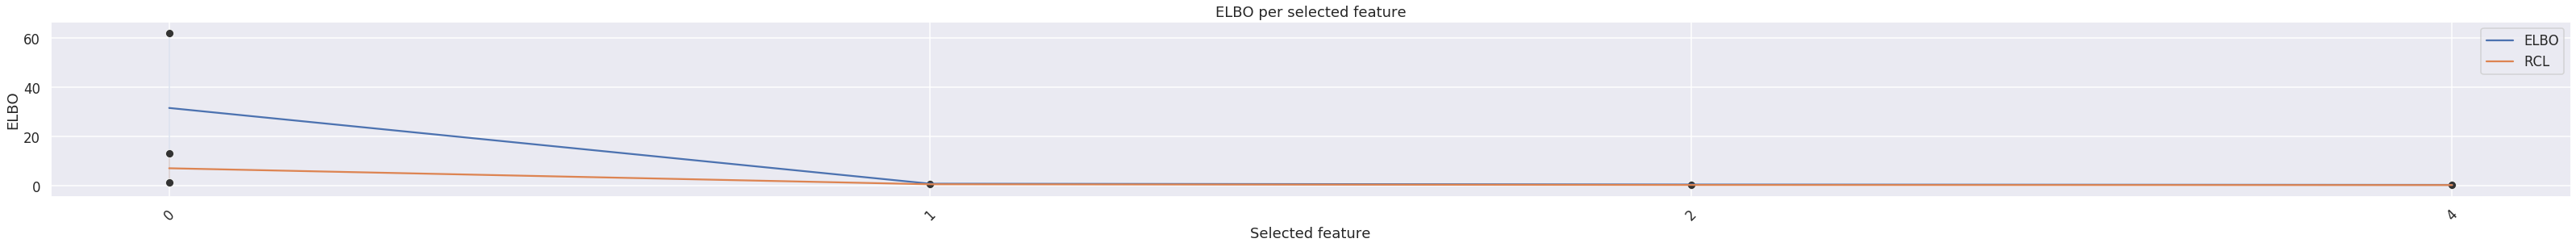

In [18]:
make_plot_encoding_greedy(args, model, stats, X_test.clone(), C_test.clone(), feature_names, save=False, proj_matrix=P)

/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


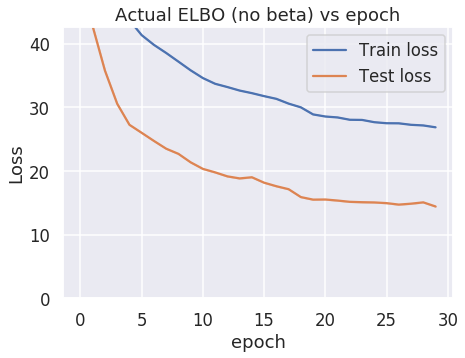

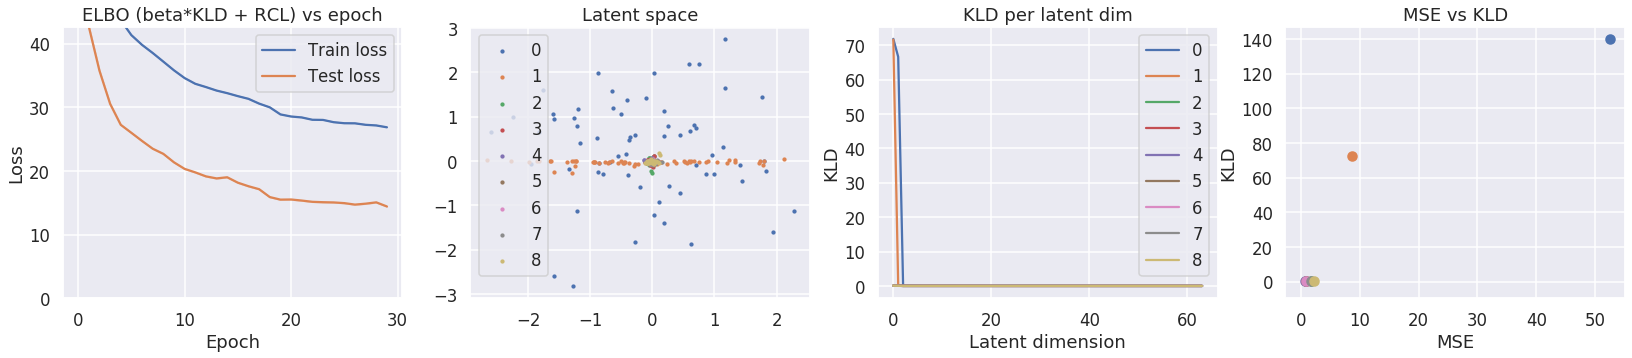

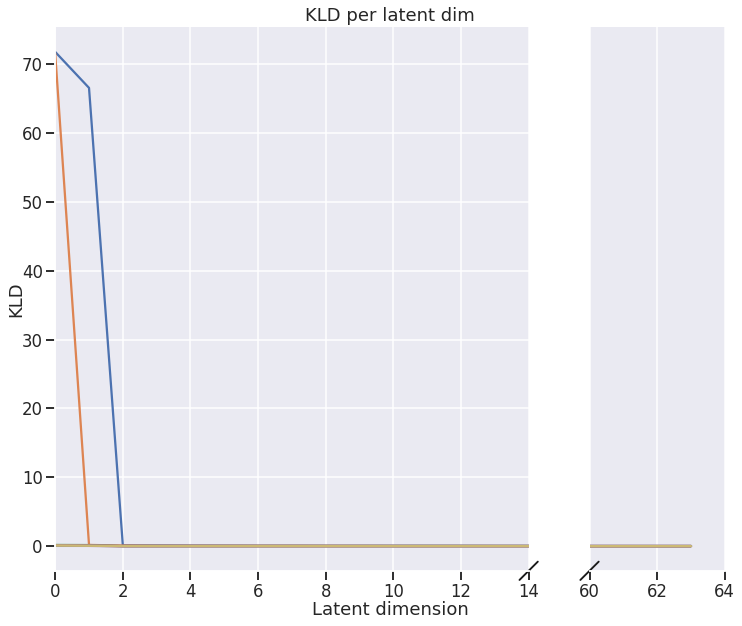

In [20]:
make_plot_encoding(args, model, stats, X_test, C_test, this_dataloader_color=None, save=False, proj_matrix=P)

In [40]:
this_dataloader

# Do PCA

In [41]:
from sklearn.decomposition import PCA
import numpy as np


In [42]:
pca = str_to_object(
        "CVAE_testbed.utils.pca.get_PCA_features"
        )

In [43]:
pca_dataframe = pca(args, this_dataloader, False)

In [44]:
pd.set_option('display.max_columns', 500)
pca_dataframe

,PC,Most_important_feature,PC_explained_variance,All_components
0,PC0,0,4.007166e+00,"[0.37226686, 0.33379245, 0.37226677, 0.3337925..."
1,PC1,1,3.935855e+00,"[0.3337925, -0.37226686, 0.33379254, -0.372266..."
2,PC2,1,3.781384e-14,"[0.00055296347, 0.7505222, 0.0013513565, -0.04..."
3,PC3,6,9.706970e-15,"[-0.053973086, 0.0018064547, -0.3894495, -0.00..."
4,PC4,0,4.799242e-16,"[0.86433375, -0.0018804967, -0.31355453, -0.00..."
5,PC5,7,1.257579e-16,"[-0.0031791313, -0.4308679, 0.0023377389, 0.44..."
6,PC6,3,2.468627e-17,"[0.001900215, -0.032595083, -0.003277734, 0.74..."
7,PC7,4,5.064184e-30,"[-1.2598309e-05, -7.580684e-08, -0.70710313, 1..."


# Make FID plot

torch.Size([8640, 159]) torch.Size([8640, 318])
[44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0, 0.0, 122.0, 150.0, 123.0, 143.0, 72.0, 156.0, 105.0, 132.0, 124.0, 102.0, 99.0, 104.0, 155.0, 89.0, 140.0, 96.0, 91.0, 131.0, 134.0, 133.0, 78.0, 125.0, 113.0, 86.0, 111.0, 137.0, 149.0, 95.0, 130.0, 116.0, 154.0, 151.0, 40.0, 119.0, 118.0, 114.0, 135.0, 77.0, 157.0, 146.0, 110.0, 148.0, 112

fid 602.5162903915663
70877
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0, 0.0, 122.0, 150.0, 123.0, 143.0, 72.0, 156.0, 105.0, 132.0, 124.0, 102.0, 99.0, 104.0, 155.0, 89.0, 140.0, 96.0, 91.0, 131.0, 134.0, 133.0, 78.0, 125.0, 113.0, 86.0, 111.0, 137.0, 149.0, 95.0, 130.0, 116.0, 154.0, 151.0, 40.0, 119.0, 118.0, 114.0, 135.0, 77.0, 157.0, 146.0, 110.0, 148.0, 112.0]
inverse 

fid 598.7793101830744
150935
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0, 0.0, 122.0, 150.0, 123.0, 143.0, 72.0, 156.0, 105.0, 132.0, 124.0, 102.0, 99.0, 104.0, 155.0, 89.0, 140.0, 96.0, 91.0, 131.0, 134.0, 133.0, 78.0, 125.0, 113.0, 86.0, 111.0, 137.0, 149.0, 95.0, 130.0, 116.0, 154.0, 151.0, 40.0, 119.0, 118.0]
inverse [47, 77, 103, 110, 112, 114, 117, 135, 138, 141, 144, 

fid 662.5495355961395
249172
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0, 0.0, 122.0, 150.0, 123.0, 143.0, 72.0, 156.0, 105.0, 132.0, 124.0, 102.0, 99.0, 104.0, 155.0, 89.0, 140.0, 96.0, 91.0, 131.0, 134.0, 133.0, 78.0, 125.0, 113.0, 86.0, 111.0, 137.0]
inverse [40, 47, 77, 95, 103, 110, 112, 114, 116, 117, 118, 119, 130, 135, 138, 141, 144, 145, 146, 148, 149, 151, 154, 157

fid 702.2663667558968
348430
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0, 0.0, 122.0, 150.0, 123.0, 143.0, 72.0, 156.0, 105.0, 132.0, 124.0, 102.0, 99.0, 104.0, 155.0, 89.0, 140.0, 96.0, 91.0]
inverse [40, 47, 77, 78, 86, 95, 103, 110, 111, 112, 113, 114, 116, 117, 118, 119, 125, 130, 131, 133, 134, 135, 137, 138, 141, 144, 145, 146, 148, 149, 151, 154, 157]
fid 757.11105878

fid 722.0045042869847
471484
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0, 0.0, 122.0, 150.0, 123.0, 143.0, 72.0, 156.0, 105.0, 132.0]
inverse [40, 47, 77, 78, 86, 89, 91, 95, 96, 99, 102, 103, 104, 110, 111, 112, 113, 114, 116, 117, 118, 119, 124, 125, 130, 131, 133, 134, 135, 137, 138, 140, 141, 144, 145, 146, 148, 149, 151, 154, 155, 157]
fid 728.3980439208018
480449
0 con

fid 735.8308516754597
561386
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0, 35.0, 53.0, 108.0, 42.0, 48.0, 106.0, 88.0, 127.0, 129.0]
inverse [0, 40, 47, 72, 77, 78, 86, 89, 91, 95, 96, 99, 102, 103, 104, 105, 110, 111, 112, 113, 114, 116, 117, 118, 119, 122, 123, 124, 125, 130, 131, 132, 133, 134, 135, 137, 138, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 154, 155, 156, 157]
fid 755.3677332573726
570379
0 conds [44.0, 27.0, 29

fid 859.1338207958966
683910
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0, 85.0, 70.0, 136.0, 126.0, 84.0, 62.0, 139.0, 152.0, 147.0]
inverse [0, 35, 40, 42, 47, 48, 53, 72, 77, 78, 86, 88, 89, 91, 95, 96, 99, 102, 103, 104, 105, 106, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 122, 123, 124, 125, 127, 129, 130, 131, 132, 133, 134, 135, 137, 138, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 154, 155, 156, 157]
fid 857.807210345737
692890
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101

fid 959.0482553595847
798299
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0, 153.0, 142.0, 115.0, 109.0, 121.0, 107.0, 2.0, 57.0, 46.0, 49.0]
inverse [0, 35, 40, 42, 47, 48, 53, 62, 70, 72, 77, 78, 84, 85, 86, 88, 89, 91, 95, 96, 99, 102, 103, 104, 105, 106, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157]
fid 946.7822444963206
815579
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 3

fid 957.9142844743737
921837
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0, 94.0, 37.0, 6.0, 31.0, 158.0, 34.0, 30.0, 28.0, 25.0, 43.0]
inverse [0, 2, 35, 40, 42, 46, 47, 48, 49, 53, 57, 62, 70, 72, 77, 78, 84, 85, 86, 88, 89, 91, 95, 96, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
fid 962.4153487154881
939117
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.

fid 967.0973225497415
1086345
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0, 13.0, 90.0, 38.0, 52.0, 15.0, 45.0, 18.0, 120.0, 32.0, 10.0]
inverse [0, 2, 6, 25, 28, 30, 31, 34, 35, 37, 40, 42, 43, 46, 47, 48, 49, 53, 57, 62, 70, 72, 77, 78, 84, 85, 86, 88, 89, 91, 94, 95, 96, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 954.0086202602101
1103625
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0

fid 942.1243619136917
1251359
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0, 69.0, 74.0, 81.0, 71.0, 87.0, 128.0, 82.0, 98.0, 63.0, 59.0]
inverse [0, 2, 6, 10, 13, 15, 18, 25, 28, 30, 31, 32, 34, 35, 37, 38, 40, 42, 43, 45, 46, 47, 48, 49, 52, 53, 57, 62, 70, 72, 77, 78, 84, 85, 86, 88, 89, 90, 91, 94, 95, 96, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 945.3373058776363
1268639
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 

fid 956.3685660230609
1416033
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0, 67.0, 39.0, 8.0, 26.0, 17.0, 73.0, 66.0, 100.0, 41.0, 11.0]
inverse [0, 2, 6, 10, 13, 15, 18, 25, 28, 30, 31, 32, 34, 35, 37, 38, 40, 42, 43, 45, 46, 47, 48, 49, 52, 53, 57, 59, 62, 63, 69, 70, 71, 72, 74, 77, 78, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 957.1741502128499
1433313
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.

fid 1017.9472308564815
1588833
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0, 9.0, 64.0, 76.0, 54.0, 1.0, 24.0, 5.0, 83.0, 20.0, 50.0, 92.0]
inverse [0, 2, 6, 8, 10, 11, 13, 15, 17, 18, 25, 26, 28, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 52, 53, 57, 59, 62, 63, 66, 67, 69, 70, 71, 72, 73, 74, 77, 78, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 1013.672187766417
1606113
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0,

fid 1091.2965743500479
1778913
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0, 22.0]
inverse [0, 1, 2, 5, 6, 8, 9, 10, 11, 13, 15, 17, 18, 20, 24, 25, 26, 28, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 57, 59, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 74, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 1092.1737973678887
1796193
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0, 3.0, 56.0, 68.0, 16.0, 55.0, 7.0, 60.0, 12.0, 14.0, 79.0]
in

fid 1099.21710576925
1968993
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0, 23.0]
inverse [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 25, 26, 28, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 1114.9595778238927
1986273
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0, 51.0, 36.0, 33.0, 19.0, 21.0, 61.0, 4.0, 58.0, 93.0, 65.0]
inverse [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25

fid 1138.4117469830785
2159073
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0, 80.0]
inverse [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
fid 1140.2597635543789
2176353
0 conds [44.0, 27.0, 29.0, 97.0, 75.0, 101.0]
inverse [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 

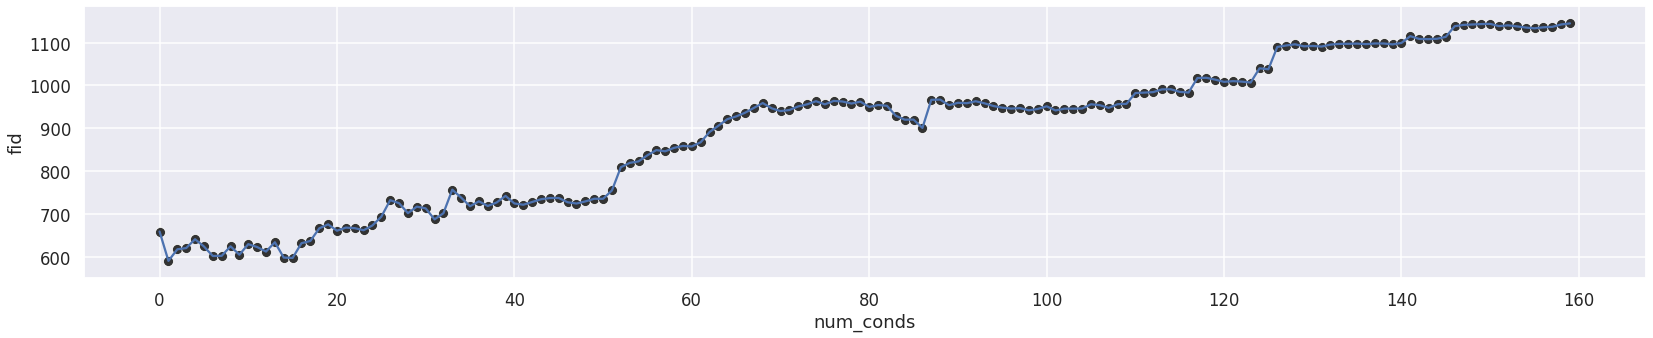

In [18]:
make_fid_plot = str_to_object(
        "CVAE_testbed.utils.FID_score.make_plot_FID"
        )

make_fid_plot(args, model, X_test, C_test, save=False)

In [21]:
X_test.size()

torch.Size([135, 64, 159])

In [22]:
C_test.size()

torch.Size([135, 64, 318])